<a href="https://colab.research.google.com/github/Edgar-Pacheco/TheoryMeshTeam10/blob/main/Project_Seba_editsV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import the libs
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [4]:
# Import the data, in this case my own google drive. 
df_envy = pd.read_csv("/content/drive/MyDrive/m2pi/project/Agricultural_Environmental_Impact_Canada.csv",
                 index_col=False,
                 sep=",",
                 engine="python")
df_envy.head()

,COUNTRY,Country,INDICATOR,Indicator,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,CAN,Canada,ORGANIC_FARMING,Organic farming,2000,2000,HA,Hectares,0,Units,NaN,NaN,340200.0,NaN,NaN
1,CAN,Canada,ORGANIC_FARMING,Organic farming,2001,2001,HA,Hectares,0,Units,NaN,NaN,430600.0,NaN,NaN
2,CAN,Canada,ORGANIC_FARMING,Organic farming,2002,2002,HA,Hectares,0,Units,NaN,NaN,478700.0,NaN,NaN
3,CAN,Canada,ORGANIC_FARMING,Organic farming,2003,2003,HA,Hectares,0,Units,NaN,NaN,516111.0,NaN,NaN
4,CAN,Canada,ORGANIC_FARMING,Organic farming,2004,2004,HA,Hectares,0,Units,NaN,NaN,488752.0,NaN,NaN


In [5]:
# Cleanning the data from NaN columns
df = df_envy
df = df.drop(columns = ["Country", "COUNTRY", "PowerCode Code","Reference Period Code","Reference Period","Flag Codes","Flags"])
df.head()

,INDICATOR,Indicator,TIME,Time,Unit Code,Unit,PowerCode,Value
0,ORGANIC_FARMING,Organic farming,2000,2000,HA,Hectares,Units,340200.0
1,ORGANIC_FARMING,Organic farming,2001,2001,HA,Hectares,Units,430600.0
2,ORGANIC_FARMING,Organic farming,2002,2002,HA,Hectares,Units,478700.0
3,ORGANIC_FARMING,Organic farming,2003,2003,HA,Hectares,Units,516111.0
4,ORGANIC_FARMING,Organic farming,2004,2004,HA,Hectares,Units,488752.0


In [6]:
#Describe the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2063 entries, 0 to 2062
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   INDICATOR  2063 non-null   object 
 1   Indicator  2063 non-null   object 
 2   TIME       2063 non-null   int64  
 3   Time       2063 non-null   int64  
 4   Unit Code  2063 non-null   object 
 5   Unit       2063 non-null   object 
 6   PowerCode  2063 non-null   object 
 7   Value      2061 non-null   float64
dtypes: float64(1), int64(2), object(5)
memory usage: 129.1+ KB


In [8]:
# Take a look of the  uniqueness  of each name in the Indicator column 
df.Indicator.unique()

array(['Organic farming', 'Total Agricultural Land area',
       'Sales of herbicides', 'Permanent Crops',
       'Total sales of agricultural pesticides', 'Permanent Pasture',
       'Sales of insecticides', 'Arable and Permanent Crop Land',
       'Arable Land', 'Sales of other pesticides', 'Transgenic crops',
       'Sales of fungicides ', 'Farmland Birds Index ',
       'Agricultural Ammonia (NH3)', 'Nitrogen oxides (Nox)',
       'Ammonia (NH3) ', 'Sulfur oxides (Sox)',
       'Total freshwater abstraction', 'Total surface water',
       'Total groundwater', 'Agriculture freshwater abstraction',
       'Agriculture groundwater', 'Agriculture surface water',
       'Irrigation area', 'Irrigable area',
       'Agricultural land classified as having tolerable water erosion risk',
       'Agricultural land classified as having low water erosion risk',
       'Agricultural land classified as having moderate water erosion risk',
       'Agricultural land classified as having high water 

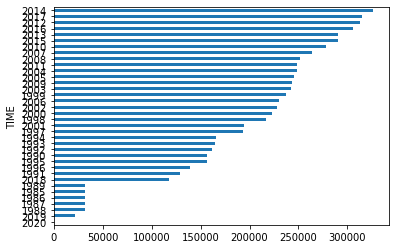

In [7]:
# This is just to take a look   to the whole columns TIME,
# the most amount of Value was in 2014
brands = df.groupby("TIME").mean().sort_values(by="Value")
brands.Value.plot(kind="barh")

In [105]:
brands = df.groupby("Indicator").mean().sort_values(by="Value")
brand_plot = brands[brands.Value > brands.Value.mean()]
brand_plot.Value.plot(kind="barh")


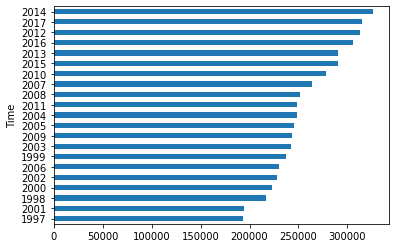

In [9]:
# In mean, the years where there were most Value.
brands = df.groupby("Time").mean().sort_values(by="Value")
brand_plot = brands[brands.Value > brands.Value.mean()]
brand_plot.Value.plot(kind="barh")


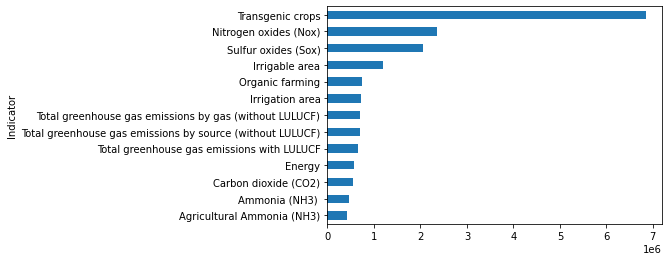

In [17]:
# In mean, the years where there were most Value.
brands = df.groupby("Indicator").mean().sort_values(by="Value")
brand_plot = brands[brands.Value > brands.Value.mean()]
brand_plot.Value.plot(kind="barh")


In [18]:
df_dummies = pd.get_dummies(df)
target = df_dummies.columns
target = target.drop('Value')
df_dummies



,TIME,Time,Value,INDICATOR_AGR,INDICATOR_AGR_SOIL,INDICATOR_ARABLELAND,INDICATOR_ARABLE_PERMANENTCROP,INDICATOR_BIODIESEL,INDICATOR_BIRDS,INDICATOR_CH4,INDICATOR_CH4AGR,INDICATOR_CH4_LULUCF,INDICATOR_CO2,INDICATOR_CO2AGR,INDICATOR_CO2_LULUCF,INDICATOR_CROPL_CH4,INDICATOR_CROPL_CO2,INDICATOR_CROPL_N2O,INDICATOR_EF,INDICATOR_EI,INDICATOR_ETHA,INDICATOR_FBOFAR,INDICATOR_FBOFAR2,INDICATOR_FORESTL_CH4,INDICATOR_FORESTL_CO2,INDICATOR_FORESTL_N2O,INDICATOR_FUNGPEST,INDICATOR_GHGAG,INDICATOR_GRASSL_CH4,INDICATOR_GRASSL_N2O,INDICATOR_HERBPEST,INDICATOR_HFC,INDICATOR_HWP_CO2,INDICATOR_INSECTPEST,INDICATOR_IPANDP,INDICATOR_IRRIGABLEAREA,INDICATOR_IRRIGATIONAREA,INDICATOR_LIMING,INDICATOR_MANUR,INDICATOR_MANURE,...,Indicator_Sulphur hexafluoride (SF6),Indicator_Total Agricultural Land area,Indicator_Total Carbone dioxide (CO2),Indicator_Total Carbone dioxide (CO2) from agriculture,Indicator_Total Methane (CH4),Indicator_Total Methane (CH4) from agriculture,Indicator_Total Nitrous oxide (N2O),Indicator_Total Nitrous oxide (N2O) from agriculture,Indicator_Total final energy consumption,Indicator_Total freshwater abstraction,Indicator_Total greenhouse gas emissions by gas (without LULUCF),Indicator_Total greenhouse gas emissions by source (without LULUCF),Indicator_Total greenhouse gas emissions from agriculture,Indicator_Total greenhouse gas emissions with LULUCF,Indicator_Total greenhouse gas from LULUCF,Indicator_Total groundwater,Indicator_Total sales of agricultural pesticides,Indicator_Total surface water,Indicator_Transgenic crops,Indicator_Transport,Indicator_Urea application,Indicator_Waste,Indicator_Wetlands,Unit Code_HA,Unit Code_IDX,Unit Code_M3,Unit Code_PC,Unit Code_TOE,Unit Code_TONNE,Unit Code_T_CO2_EQVT,Unit_Cubic metres,Unit_Hectares,Unit_Index,Unit_Percentage,Unit_Tonnes,Unit_Tonnes of CO2 equivalent,Unit_Tonnes of oil equivalent (toe),PowerCode_Millions,PowerCode_Thousands,PowerCode_Units
0,2000,2000,340200.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,2001,2001,430600.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,2002,2002,478700.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,2003,2003,516111.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,2004,2004,488752.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2058,2014,2014,62.478,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
2059,2015,2015,58.343,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
2060,2016,2016,54.035,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
2061,2017,2017,46.314,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0


In [12]:
msk = np.random.rand(len(df)) < 0.8
df_train = df[msk]
df_test  = df[~msk]


In [14]:
n=155
X = df_dummies['Unit_Tonnes of CO2 equivalent']
y = df.Value
df_dummies[target].isnull().sum()
target[n]
#X.array.reshape(-1,1)
df.Unit

0                       Hectares
1                       Hectares
2                       Hectares
3                       Hectares
4                       Hectares
                  ...           
2058    Tonnes of CO2 equivalent
2059    Tonnes of CO2 equivalent
2060    Tonnes of CO2 equivalent
2061    Tonnes of CO2 equivalent
2062    Tonnes of CO2 equivalent
Name: Unit, Length: 2063, dtype: object

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_tr, y_tr)
y_hat = model.predict(X_tr)
print(f"average relative training error: {100*np.mean(np.abs(y_hat - y_tr)/y_tr):.2f}%")
y_hat = model.predict(X_te)
print(f"average relative testing error: {100*np.mean(np.abs(y_hat - y_te)/y_te):.2f}%")

ValueError: ignored